# Benchmarking: retrieving and comparing against published results

You can access all archived published results for time series classification (TSC)
directly with ``aeon``. These results are all stored on the website
[timeseriesclassification.com](https://timeseriesclassification.com). 

These are reference results tied to publications and will not change. The datasets and 
estimators for recovering these results are intentionally hard coded and not generalised, 
to remove any potential for confusion. To more flexibly load the latest results for 
classification, clustering and regression, see the notebook on
[loading reference results](./reference_results.ipynb).

We compare results with the critical difference graph described in 
[this notebook](./plotting_results.ipynb). Note that the way we group classifiers 
has slightly changed and hence there may be small variation in cliques from published 
results.

The published results can be recovered from the [time series classifcation
website](https://timeseriesclassification.com/results/PublishedResults/) directly or
with ``aeon``.

## Classification

These results were presented in three bake offs for classification: The first bake
off [[1]](#references) used 85 UCR univariate TSC datasets. The second bake off [[2]](#references) introduced the
multivariate TSC archive, and compared classifier performance. The third bake off [[3]](#references),
the bake off redux, compared univariate classifiers on 112 UCR datasets. 

### The great time series classification bake off, 2017

The first TSC bake off [[1]](#references), conducted in 2015 and published in 2017 compared 25
classifiers on the 85 UCR data that were released in 2015. The publication is
available [here](https://link.springer.com/article/10.1007/s10618-016-0483-9).

You can pull down results for the original bake off using the following function. 
The default train/test split is returned as the first resample, and there are
100 resamples available for most experiments. The data resampling function used is 
not the same as the one available in ``aeon``.

In [1]:
from aeon.benchmarking.published_results import (
    load_classification_bake_off_2017_results,
)

results_dict = load_classification_bake_off_2017_results(num_resamples=10)
results_dict["FlatCOTE"]["GunPoint"]

array([1.        , 0.98666667, 0.99333333, 1.        , 1.        ,
       0.97333333, 0.98      , 0.99333333, 1.        , 1.        ])

We were unable to recover experiment resamples past a certain point for some 
classifier/dataset combinations. Missing resamples will return a NaN

In [2]:
results_dict["DTW_F"]["FordB"]

array([0.74938272, 0.88888889, 0.78765432, 0.88148148, 0.87407407,
       0.87654321,        nan,        nan,        nan,        nan])

In [3]:
results_arr, datasets, classifiers = load_classification_bake_off_2017_results(
    num_resamples=100, as_array=True, ignore_nan=True
)
results_arr.shape

(85, 25)

The dataset used for the first bake off are described in [[4]](#references):

In [4]:
datasets

['Adiac',
 'ArrowHead',
 'Beef',
 'BeetleFly',
 'BirdChicken',
 'Car',
 'CBF',
 'ChlorineConcentration',
 'CinCECGTorso',
 'Coffee',
 'Computers',
 'CricketX',
 'CricketY',
 'CricketZ',
 'DiatomSizeReduction',
 'DistalPhalanxOutlineCorrect',
 'DistalPhalanxOutlineAgeGroup',
 'DistalPhalanxTW',
 'Earthquakes',
 'ECG200',
 'ECG5000',
 'ECGFiveDays',
 'ElectricDevices',
 'FaceAll',
 'FaceFour',
 'FacesUCR',
 'FiftyWords',
 'Fish',
 'FordA',
 'FordB',
 'GunPoint',
 'Ham',
 'HandOutlines',
 'Haptics',
 'Herring',
 'InlineSkate',
 'InsectWingbeatSound',
 'ItalyPowerDemand',
 'LargeKitchenAppliances',
 'Lightning2',
 'Lightning7',
 'Mallat',
 'Meat',
 'MedicalImages',
 'MiddlePhalanxOutlineCorrect',
 'MiddlePhalanxOutlineAgeGroup',
 'MiddlePhalanxTW',
 'MoteStrain',
 'NonInvasiveFetalECGThorax1',
 'NonInvasiveFetalECGThorax2',
 'OliveOil',
 'OSULeaf',
 'PhalangesOutlinesCorrect',
 'Phoneme',
 'Plane',
 'ProximalPhalanxOutlineCorrect',
 'ProximalPhalanxOutlineAgeGroup',
 'ProximalPhalanxTW',
 

The classifiers used are as follows: 

In [5]:
classifiers

['ACF',
 'BOSS',
 'CID_DTW',
 'CID_ED',
 'DDTW_R1_1NN',
 'DDTW_Rn_1NN',
 'DTW_F',
 'EE',
 'ERP_1NN',
 'Euclidean_1NN',
 'FlatCOTE',
 'FS',
 'LCSS_1NN',
 'LPS',
 'LS',
 'MSM_1NN',
 'PS',
 'RotF',
 'SAXVSM',
 'ST',
 'TSBF',
 'TSF',
 'TWE_1NN',
 'WDDTW_1NN',
 'WDTW_1NN']

Once you have the results you want, you can compare classifiers with built in 
``aeon`` tools.

Suppose we want to recreate the critical difference diagram published in [1]:

<img src="img/bakeoff2015.png" width="600" alt="bake off 2015">

This displays the critical difference diagram [[6]](#references) for comparing classifiers. It shows
 the average rank of each estimator over all datasets. It then groups estimators for
 which there is no significant difference in rank into cliques, shown with a solid
 bar. The published results used the original method for finding cliques called the
 post hoc Nemenyi test. Our plotting tool offers this as an alternative. See the docs
  for ``aeon.visualisation.plot_critical_difference`` for more details. To recreate the
 above, we can do this (note slight difference in names, ``MSM_1NN`` is `MSM` and
 ``FlatCOTE`` is ``COTE``.

(<Figure size 600x280 with 1 Axes>, <Axes: >)

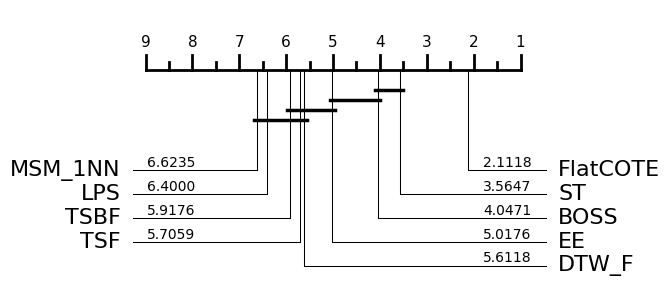

In [6]:
from aeon.visualisation import plot_critical_difference

subsample = ["MSM_1NN", "LPS", "TSBF", "TSF", "DTW_F", "EE", "BOSS", "ST", "FlatCOTE"]
idx = [classifiers.index(key) for key in subsample if key in classifiers]

plot_critical_difference(results_arr[:, idx], subsample, test="Nemenyi")

Note there are some  small differences in averaged rank. This may be due to differences 
in how ties in rank were handled and missing resamples. The cliques are identical. Given that
these results were generated in 2014/2015 using Java and Matlab was used to draw the diagrams, we think this
is an acceptable reproduction. Subsequent to the 2015 bake off we switched to using
pairwise Wilcoxon sign rank tests with the Holm correction. This creates slightly
different cliques.

### The great multivariate time series classification bake off, 2021

The multivariate bake off [[2]](#references) launched a new archive and compared 11 classifiers on 26
multivariate TSC problems [[5]](#references) over 30 resamples. The publication is available
[here](https://link.springer.com/article/10.1007/s10618-020-00727-3)

In [7]:
from aeon.benchmarking.published_results import (
    load_classification_bake_off_2021_results,
)

results_arr, datasets, classifiers = load_classification_bake_off_2021_results(
    num_resamples=30, as_array=True
)
results_arr.shape

(26, 11)

The datasets used in the 2021 bake off are as follows:

In [8]:
datasets

['ArticularyWordRecognition',
 'AtrialFibrillation',
 'BasicMotions',
 'Cricket',
 'DuckDuckGeese',
 'EigenWorms',
 'Epilepsy',
 'EthanolConcentration',
 'ERing',
 'FaceDetection',
 'FingerMovements',
 'HandMovementDirection',
 'Handwriting',
 'Heartbeat',
 'Libras',
 'LSST',
 'MotorImagery',
 'NATOPS',
 'PenDigits',
 'PEMS-SF',
 'PhonemeSpectra',
 'RacketSports',
 'SelfRegulationSCP1',
 'SelfRegulationSCP2',
 'StandWalkJump',
 'UWaveGestureLibrary']

The classifiers used as follow:

In [9]:
classifiers

['CBOSS',
 'CIF',
 'DTW_D',
 'DTW_I',
 'gRSF',
 'HIVE-COTEv1',
 'ResNet',
 'RISE',
 'ROCKET',
 'STC',
 'TSF']

The results figures below shows the performance figures for accuracy, balanced
accuracy, AUROC and F1.

<img src="img/bakeoff2021.png" width="600" alt="bake off 2021">

We can recreate the accuracy graph by plotting the loaded results like so:

D:\CMP_Machine_Learning\Repositories\aeon\.venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:600: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  return result_to_tuple(hypotest_fun_out(*samples, **kwds))


(<Figure size 600x300 with 1 Axes>, <Axes: >)

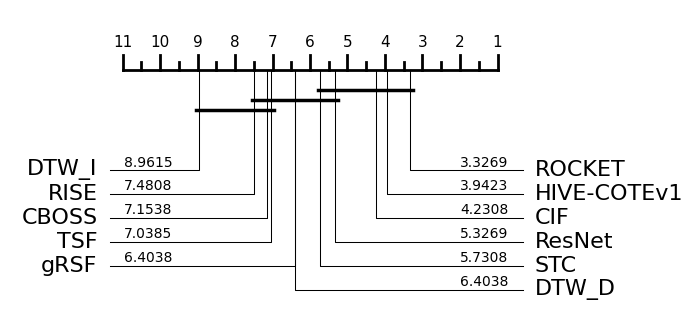

In [10]:
plot_critical_difference(results_arr, classifiers)

Note there are some differences in cliques due to slightly different methodology
and tools used as mentioned previously.

### Univariate bake off redux, 2023

In 2023 an update to the original 2017 bake off was produced, including the state of the art for the time [[3]](#references). This is the first bake off produced using the tools and estimators available in ``aeon``. Published in 2024, the article is available [here](https://link.springer.com/article/10.1007/s10618-024-01022-1)

34 algorithms were evaluated in total. 142 datasets were used for the top performing classifiers, and 112 for others. All results were averaged over 30 resamples. 

Currently some estimators are missing. Only 112 datasets are available for all estimators, but in time we will upload the remaining datasets where applicable.

In [11]:
from aeon.benchmarking.published_results import (
    load_classification_bake_off_2023_results,
)

results_arr, datasets, classifiers = load_classification_bake_off_2023_results(
    num_resamples=30, as_array=True
)
results_arr.shape

(112, 34)

In [12]:
datasets

['ACSF1',
 'Adiac',
 'ArrowHead',
 'Beef',
 'BeetleFly',
 'BirdChicken',
 'BME',
 'Car',
 'CBF',
 'Chinatown',
 'ChlorineConcentration',
 'CinCECGTorso',
 'Coffee',
 'Computers',
 'CricketX',
 'CricketY',
 'CricketZ',
 'Crop',
 'DiatomSizeReduction',
 'DistalPhalanxOutlineCorrect',
 'DistalPhalanxOutlineAgeGroup',
 'DistalPhalanxTW',
 'Earthquakes',
 'ECG200',
 'ECG5000',
 'ECGFiveDays',
 'ElectricDevices',
 'EOGHorizontalSignal',
 'EOGVerticalSignal',
 'EthanolLevel',
 'FaceAll',
 'FaceFour',
 'FacesUCR',
 'FiftyWords',
 'Fish',
 'FordA',
 'FordB',
 'FreezerRegularTrain',
 'FreezerSmallTrain',
 'GunPoint',
 'GunPointAgeSpan',
 'GunPointMaleVersusFemale',
 'GunPointOldVersusYoung',
 'Ham',
 'HandOutlines',
 'Haptics',
 'Herring',
 'HouseTwenty',
 'InlineSkate',
 'InsectEPGRegularTrain',
 'InsectEPGSmallTrain',
 'InsectWingbeatSound',
 'ItalyPowerDemand',
 'LargeKitchenAppliances',
 'Lightning2',
 'Lightning7',
 'Mallat',
 'Meat',
 'MedicalImages',
 'MiddlePhalanxOutlineCorrect',
 'Midd

In [13]:
classifiers

['Arsenal',
 'BOSS',
 'CIF',
 'CNN',
 'Catch22',
 'DrCIF',
 'EE',
 'FreshPRINCE',
 'HC1',
 'HC2',
 'Hydra-MR',
 'Hydra',
 'InceptionT',
 'Mini-R',
 'MrSQM',
 'Multi-R',
 'PF',
 'RDST',
 'RISE',
 'ROCKET',
 'RSF',
 'RSTSF',
 'ResNet',
 'STC',
 'ShapeDTW',
 'Signatures',
 'TDE',
 'TS-CHIEF',
 'TSF',
 'TSFresh',
 'WEASEL-D',
 'WEASEL',
 'cBOSS',
 '1NN-DTW']

(<Figure size 600x250 with 1 Axes>, <Axes: >)

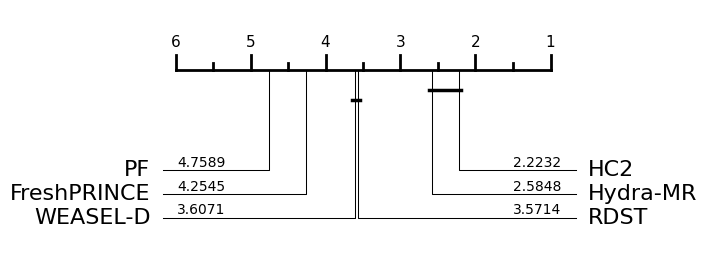

In [14]:
subsample = ["PF", "FreshPRINCE", "WEASEL-D", "RDST", "Hydra-MR", "HC2"]
idx = [classifiers.index(key) for key in subsample if key in classifiers]

plot_critical_difference(results_arr[:, idx], subsample)

## References <a id='references'></a>

[1] Bagnall, A., Lines, J., Bostrom, A., Large, J. and Keogh, E., 2017. The great time series classification bake off: a review and experimental evaluation of recent algorithmic advances. Data mining and knowledge discovery, 31, pp.606-660.

[2] Ruiz, A.P., Flynn, M., Large, J., Middlehurst, M. and Bagnall, A., 2021. The great multivariate time series classification bake off: a review and experimental evaluation of recent algorithmic advances. Data Mining and Knowledge Discovery, 35(2), pp.401-449.

[3] Middlehurst, M., Schäfer, P. and Bagnall, A., 2024. Bake off redux: a review and experimental evaluation of recent time series classification algorithms. Data Mining and Knowledge Discovery, pp.1-74.

[4] Dau, H.A., Bagnall, A., Kamgar, K., Yeh, C.C.M., Zhu, Y., Gharghabi, S., Ratanamahatana, C.A. and Keogh, E., 2019. The UCR time series archive. IEEE/CAA Journal of Automatica Sinica, 6(6), pp.1293-1305.

[5] Bagnall, A., Dau, H.A., Lines, J., Flynn, M., Large, J., Bostrom, A., Southam, P. and Keogh, E., 2018. The UEA multivariate time series classification archive, 2018. arXiv preprint arXiv:1811.00075.

[6] Garcia, S. and Herrera, F., 2008. An Extension on" Statistical Comparisons of Classifiers over Multiple Data Sets" for all Pairwise Comparisons. Journal of machine learning research, 9(12).
